In [ ]:
!pip install --upgrade transformers
!pip install simpletransformers

     |████████████████████████████████| 1.4MB 23.5MB/s 
     |████████████████████████████████| 890kB 49.5MB/s 
     |████████████████████████████████| 2.9MB 51.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=cb6d5ad18c59085b515b8be81bf2479f62e365bc8cda14eba0aed69867106f43
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
     |████████████████████████████████| 204kB 10.7MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 1.8MB 32.6MB/s 
     |████████████████████████████████| 71kB 10.4MB/s 
     |████████████████████████████████| 7.4MB 42.0MB/s 
     |████████████████████████████████| 317kB 52.6MB/s 
     |████████████████████████████████| 1.1MB 47.7MB/s 
     |████████████████████████████████| 163kB 57.3MB/s 
     |████████████████████████████████| 102kB 14.2MB/s 
     |███████████████████████████

In [ ]:
# importing important libraries
# checking if the libraries are all good,or is missing thing!
# used try/except to handle it!

try:
  # !pip install --upgrade transformers
  # !pip install simpletransformers
  from sklearn.metrics import f1_score
  from sklearn.model_selection import train_test_split
  from simpletransformers.classification import ClassificationModel, ClassificationArgs
  import pandas as pd
  import numpy as np
  import seaborn as sns
  sns.set_theme(style="darkgrid")

except Exception as e:
  print('Package Error! \n\n {}'.format(e))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#EDA
# calling the train/test data, just to make everything easy!
train = pd.read_csv('/content/drive/MyDrive/hahakathon/train.csv')
test  = pd.read_csv('/content/drive/MyDrive/hahakathon/public_dev.csv')

train.head()

,id,text,is_humor,humor_rating,humor_controversy,offense_rating
0,1,TENNESSEE: We're the best state. Nobody even c...,1,2.42,1.0,0.2
1,2,A man inserted an advertisement in the classif...,1,2.50,1.0,1.1
2,3,How many men does it take to open a can of bee...,1,1.95,0.0,2.4
3,4,Told my mom I hit 1200 Twitter followers. She ...,1,2.11,1.0,0.0
4,5,Roses are dead. Love is fake. Weddings are bas...,1,2.78,0.0,0.1


In [ ]:
# we take just the first three columns,
# cuz for the task1a (id, text, is_humor) is the one important to
# feed it to the model, for the predictions!
train = train.iloc[:,0:3]
train.head()

,id,text,is_humor
0,1,TENNESSEE: We're the best state. Nobody even c...,1
1,2,A man inserted an advertisement in the classif...,1
2,3,How many men does it take to open a can of bee...,1
3,4,Told my mom I hit 1200 Twitter followers. She ...,1
4,5,Roses are dead. Love is fake. Weddings are bas...,1


In [ ]:
#shapes of the both train/test sets 
print('Shape of train set {}'.format(train.shape))
print('Shape of test  set {}'.format(test.shape))

Shape of train set (8000, 3)
Shape of test  set (1000, 2)


In [ ]:
# number of values inside the important column for this task(task1a)
# 0 is notHumor, 1 isHumor!
train['is_humor'].value_counts()

1    4932
0    3068
Name: is_humor, dtype: int64

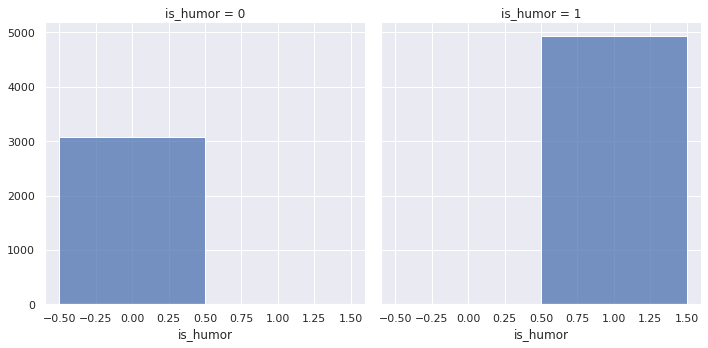

In [ ]:
#visualizing the column for more understanding!
sns.FacetGrid(train, col="is_humor", height=5).map(sns.histplot, "is_humor")

In [ ]:
# init the train columns!
train.columns = ['id','text', 'labels']
print(train.columns)

Index(['id', 'text', 'labels'], dtype='object')


In [ ]:
# declaring the train_df  and valid_df values!
train_df, valid_df = train_test_split(train, test_size=0.20, stratify=train['labels'], random_state=10)

In [ ]:
#Model args and parameters to start the traring process!!
model_args = ClassificationArgs(num_train_epochs=5, learning_rate=1e-5, overwrite_output_dir=True, manual_seed=42, silent=True)
model = ClassificationModel(model_type='roberta', model_name='roberta-base', use_cuda=True, num_labels=2, args=model_args)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out

In [ ]:
# training the model, with the train set!
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:216: UserWarning: Please also save or load the state of the optimizer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


(4000, 0.14727070060972255)

In [ ]:
# extracting the results,
# and then starting the presictions with the test set!!
result, model_outputs, wrong_predictions = model.eval_model(valid_df)
print(f'Results: {result}')

Results: {'mcc': 0.9092237363797311, 'tp': 946, 'tn': 585, 'fp': 29, 'fn': 40, 'eval_loss': 0.27438802012924496}


In [ ]:
# the predictions step(f1-score),
# here we predicting the output using the model_output and valid_df!!
predictions = []
for x in model_outputs:
    predictions.append(np.argmax(x))

print(f"f1-score: %{round(f1_score(valid_df['labels'], predictions), 4)}")

f1-score: %0.9648


In [ ]:
# here we calc the  (precision, recall, accuracy), by using those equations!
# Precision = TP/(TP+FP), Sensitivity(recall)=TP/(TP+FN), Accuracy=(TP+TN)/(TP+TN+FP+FN)

res = []
for key in result.keys():
  res.append(result[key])
# print(f'All keys: {res}')

TP = res[1]
TN = res[2]
FP = res[3]
FN = res[4]
# print(f'TP:{TP}, TN:{TN}, FP:{FP}, FN:{FN}')

precision = TP / (TP+FP)
recall = TP / (TP+FN)
accuracy = (TP+TN) / (TP+TN+FP+FN)
print(f"Precision: %{round(precision, 4)} \nRecall: %{round(recall, 4)} \nAccuracy: %{round(accuracy, 4)}")

Precision: %0.9703 
Recall: %0.9594 
Accuracy: %0.9569


In [ ]:
#predicting using the test set!
test_predictions, raw_outputs = model.predict(test['text'])

In [ ]:
# saving the result to .csv path file,
# to submit it on codalab!!
id = test['id']
is_humor = test_predictions
submit = pd.DataFrame({'id': id, 'is_humor':is_humor})
submit.to_csv('submit7.csv', index=False)

In [ ]:
import zipfile
#declaring the submition,
# and writing to zip file!
submition = zipfile.ZipFile("submit7.zip", mode='w', compression=zipfile.ZIP_DEFLATED)
submition.write("submit7.csv")
 
submition.close()